In [260]:
# import thư viện numpy
import numpy as np
# import thư viện matplotlib
import matplotlib.pyplot as plt

import scipy.sparse as sp


# Tải dữ liệu data X và y đã được xử lý thành ma trận
labels = np.load('D:/Document/Machine_Learning/CS3/label.npy')
# dữ liệu bình thường dùng hàm tách
# features = sp.load_npz('D:/Document/Machine_Learning/CS3/tfidf.npz')

# dữ liệu tf_idf loại bỏ stop words
features = sp.load_npz('D:/Document/Machine_Learning/CS3/tf_idf_processed_data_sw.npz')
# dữ liệu tf_idf không loại bỏ stop words
# features = sp.load_npz('D:/Document/Machine_Learning/CS3/tf_idf_processed_data_pt.npz')

# dữ liệu boolean loại bỏ stop words
# features = sp.load_npz('D:/Document/Machine_Learning/CS3/boolean_processed_data_sw.npz')
# dữ liệu boolean không loại bỏ stop words
# features = sp.load_npz('D:/Document/Machine_Learning/CS3/boolean_processed_data_pt.npz')

# dữ liệu tf loại bỏ stop words
# features = sp.load_npz('D:/Document/Machine_Learning/CS3/tf_processed_data_sw.npz')
# dữ liệu tf không loại bỏ stop words
# features = sp.load_npz('D:/Document/Machine_Learning/CS3/tf_processed_data_pt.npz')

# dữ liệu idf loại bỏ stop words
# features = sp.load_npz('D:/Document/Machine_Learning/CS3/idf_processed_data_sw.npz')
# dữ liệu idf không loại bỏ stop words
# features = sp.load_npz('D:/Document/Machine_Learning/CS3/idf_processed_data_pt.npz')

def add_bias(features, labels):
    '''
    features là ma trận N*X với N là số datapoint, X là số term trong dictionary
    labels là ma trận N*1 với N là số datapoint
    
    Hàm trả về ma trận features(sau khi đã thêm 1 cột bias giá trị 1 cho tất cả các phần tử) và labels
    '''
    # Thêm cột giá trị bias cho dữ liệu
    labels_final = sp.csr_matrix(labels, shape = (1, len(labels)))
    matrix_ones = sp.csc_matrix((26709,1),dtype=np.float)
    matrix_ones[:]=1
    matrix_final_features= sp.csc_matrix(sp.hstack((features,matrix_ones)))
    return matrix_final_features, labels_final

# chia Train và test
matrix_final_features, labels_final = add_bias(features, labels)
X_Train = matrix_final_features[:20000]
X_test = matrix_final_features[20000:]
y_Train = labels_final.T[:20000]
y_test = labels_final.T[20000:]

# Hàm Sigmoid

In [107]:
def sigmoid(z):
    # hàm sigmoid
    '''
    z là model đầu ra Linear Regression
    np.exp là e mũ
    Hàm trả về sigmoid của z
    
    '''
    return 1/(1+np.exp(-z))

# Hàm Cost Function

In [108]:
def Cost_Function(w, y, X):
    '''
    w là ma trận bộ tham số có shape bằng (1,X.shape[1])
    X là features
    y là y labels
    Hàm trả về cost tương ứng bộ tham số w
    
    '''
    # tính giá trị đầu ra của hàm Linear Regression
    s = X.dot(w).toarray()
    # scale s về khoảng [0,1] dùng hàm sigmoid
    # z là xác xuất điểm dữ liệu rơi vào lớp y
    z = sigmoid(s)
    y = y.toarray()
    
    cost = -np.sum((y*(np.log(z)) + (1-y)*np.log(1-z)))/ X.shape[0]
    
    return cost

# Hàm tính đạo hàm 

In [109]:
def Derivative(w, y, X):
    '''
    W là ma trận bộ trọng số w: (28901, 1)  <class 'scipy.sparse.csc.csc_matrix'>
    y là dữ liệu labels y: (1, 1) <class 'scipy.sparse.csc.csc_matrix'>
    X là dữ liệu Train X: (28901, 1) <class 'scipy.sparse.csr.csr_matrix'>
    
    Hàm trả về giá trị đạo hàm của Cost theo từng w
    '''
    # tính giá trị đầu ra của hàm Linear Regression
    s = X.dot(w).toarray()
    # scale s về khoảng [0,1] dùng hàm sigmoid
    # z là xác xuất điểm dữ liệu rơi vào lớp y
    z = sigmoid(s)
    y = y.toarray()
#     print('z',z.shape, type(z))
#     print('y',y.shape, type(y))
#     print('X',X.shape, type(X))
    der = (z-y).T
    
    X = X.T
#     print(X.shape, type(X))
    der = sp.csr_matrix(der, shape = (1,der.shape[1]))
    der = der.T
#     print(der.shape, type(der))
    
    return X.dot(der)

# Khởi tạo Learning Rate

In [110]:
# Khởi tạo learning rate
alpha = 0.0005
gama = .9


# Prediction

In [111]:
def Prediction(w, y, X):
    '''
    W là ma trận bộ trọng số w: (28901, 1)  <class 'scipy.sparse.csc.csc_matrix'>
    y là dữ liệu labels y: (1, 1) <class 'scipy.sparse.csc.csc_matrix'>
    X là dữ liệu Train X: (28901, 1) <class 'scipy.sparse.csr.csr_matrix'>
    
    Hàm trả về ma trận N*1 với N là số datapoint
    '''
     # tính giá trị đầu ra của hàm Linear Regression
    s = X.dot(w).toarray()
    # scale s về khoảng [0,1] dùng hàm sigmoid
    # z là xác xuất điểm dữ liệu rơi vào lớp y
    z = sigmoid(s)
    for i in range(z.shape[0]):
        if(z[i]>0.5):
            z[i] = 1
        else: z[i] = 0
    return z

In [261]:
# Khởi tạo ma trận biến với giá trị khởi tạo tại mỗi phần tử là 0
w = np.zeros((X_Train.shape[1], 1))
w = sp.csc_matrix(w, shape = (len(w),1))

# BGD 

epoch =  0 cost =  0.5457742219844255
epoch =  5 cost =  0.5817846439909844
epoch =  10 cost =  0.29503077021270824
epoch =  15 cost =  0.23877276443022483
epoch =  20 cost =  0.21345949791355548
epoch =  25 cost =  0.19529172594496597
epoch =  30 cost =  0.18063221030883733
epoch =  35 cost =  0.1684144229368839
epoch =  40 cost =  0.15802729174026292
epoch =  45 cost =  0.14906019787671282
epoch =  50 cost =  0.1412223273341671
epoch =  55 cost =  0.13430024334325344
epoch =  60 cost =  0.1281329483537288
epoch =  65 cost =  0.12259628697373796
epoch =  70 cost =  0.1175927387317791
epoch =  75 cost =  0.11304449521373097
epoch =  80 cost =  0.10888862637171302
epoch =  85 cost =  0.10507362325263848
epoch =  90 cost =  0.10155687427177722
epoch =  95 cost =  0.09830279022752149
epoch =  100 cost =  0.09528138957941008
epoch =  105 cost =  0.09246721620021446
epoch =  110 cost =  0.08983850113918763
epoch =  115 cost =  0.08737650604177481
epoch =  120 cost =  0.08506500357223809
epo

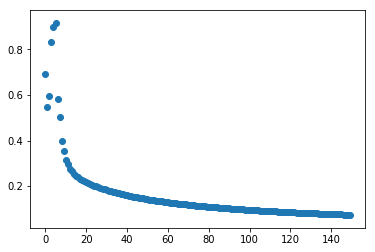

In [262]:
# list chứa tất cả mse
all_Cost = []

# Khởi tạo số vòng lặp
num = 150

# Huấn luyện
for i in range(num):
    # Tính cost với w hiện thời
    err = Cost_Function(w, y_Train, X_Train)
    all_Cost.append(err)
    # Cập nhật w theo công thức gradient descent
    der = Derivative(w, y_Train, X_Train)
    w = w - alpha*der 
    
    if i % 5 == 0:
        # In ra cost tại vòng lặp thứ i
        print("epoch = ", i, "cost = ",Cost_Function(w, y_Train, X_Train))

# kiểm tra trên tập test
print("Cost trên tập test_data:", Cost_Function(w, y_test, X_test))
# Vẽ đồ thị biễu diễn cost qua từng vòng lặp
axis_x = list(range(num))
axis_y = all_Cost
plt.scatter(axis_x, axis_y)
plt.show()

In [213]:
# Khởi tạo ma trận biến với giá trị khởi tạo tại mỗi phần tử là 0
w = np.zeros((X_Train.shape[1], 1))
w = sp.csc_matrix(w, shape = (len(w),1))
#v
v = np.zeros((X_Train.shape[1], 1))
v = sp.csc_matrix(v, shape = (len(v),1))

# Momentum BGD

epoch =  0 cost =  0.6903933780494115
epoch =  1 cost =  0.6540336076559101
epoch =  2 cost =  0.6461814971595427
epoch =  3 cost =  0.6153392229895112
epoch =  4 cost =  0.5984298955111452
epoch =  5 cost =  0.5843268408660528
epoch =  6 cost =  0.5637441975181596
epoch =  7 cost =  0.5566365331885278
epoch =  8 cost =  0.5371751359720516
epoch =  9 cost =  0.531049588731224
Cost trên tập test_data: 0.5591022364513233


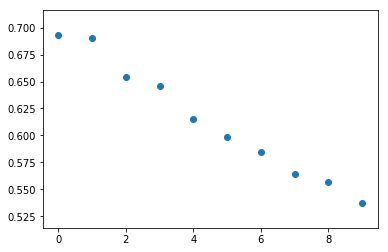

In [214]:
# list chứa tất cả mse
all_Cost = []
# Khởi tạo learning rate

# Khởi tạo số vòng lặp
num = 10

# Huấn luyện
for i in range(num):
    # Tính cost với w hiện thời
    err = Cost_Function(w, y_Train, X_Train)

    all_Cost.append(err)
    # Cập nhật w theo công thức gradient descent
    der = Derivative(w, y_Train, X_Train)
    v = gama*v + alpha*der
    w = w - v 

    # In ra cost tại vòng lặp thứ i
    print("epoch = ", i, "cost = ",Cost_Function(w, y_Train, X_Train))
        
# kiểm tra trên tập test
print("Cost trên tập test_data:", Cost_Function(w, y_test, X_test))
# Vẽ đồ thị biễu diễn cost qua từng vòng lặp
axis_x = list(range(num))
axis_y = all_Cost
plt.scatter(axis_x, axis_y)
plt.show()

In [253]:
# Khởi tạo ma trận biến với giá trị khởi tạo tại mỗi phần tử là 0
w = np.zeros((X_Train.shape[1], 1))
w = sp.csc_matrix(w, shape = (len(w),1))
#v
v = np.zeros((X_Train.shape[1], 1))
v = sp.csc_matrix(v, shape = (len(v),1))

# NAG

epoch =  0 cost =  0.5653322812157848
epoch =  1 cost =  1.0489206264072513
epoch =  2 cost =  0.6036344874367541
epoch =  3 cost =  0.5263009305879124
epoch =  4 cost =  nan
Cost trên tập test_data: 0.8355790224863429


D:\Anaconda3\envs\Nguyen\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


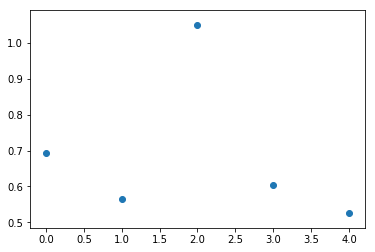

In [254]:
# list chứa tất cả mse
all_Cost = []
# Khởi tạo learning rate

# Khởi tạo số vòng lặp
num = 5

# Huấn luyện
for i in range(num):
    # Tính cost với w hiện thời
    err = Cost_Function(w, y_Train, X_Train)
    all_Cost.append(err)
    # Cập nhật w theo công thức gradient descent
    
    der = Derivative(w-gama*v, y_Train, X_Train)
    v = gama*v + alpha*der
    w = w - v 
    
    # In ra cost tại vòng lặp thứ i
    print("epoch = ", i, "cost = ",Cost_Function(w, y_Train, X_Train))
# kiểm tra trên tập test
print("Cost trên tập test_data:", Cost_Function(w, y_test, X_test))
# Vẽ đồ thị biễu diễn cost qua từng vòng lặp
axis_x = list(range(num))
axis_y = all_Cost
plt.scatter(axis_x, axis_y)
plt.show()

In [259]:
# Lưu bộ tham số xuống file npz
sp.save_npz('D:/Document/Machine_Learning/CS3/w_idf_processed_data_pt.npz', w)

In [263]:
y_pred = Prediction(w, y_test, X_test)

# Accuracy

In [264]:
from sklearn.metrics import accuracy_score
print('Accuracy = ',accuracy_score(y_pred, y_test.toarray()))

Accuracy =  0.7899836041138769


In [221]:
def Accuracy(y_pred, y_test):
    
    count = 0
    for i in range(y_pred.shape[0]):
        if y_pred[i] == y_test[i]:
            count += 1
    return count/y_pred.shape[0]

print('Accuracy = ',Accuracy(y_pred, y_test.toarray()))

Accuracy =  0.7682217916231927


In [222]:
# tính tổng số điểm dữ liệu dự đoán có nhãn là 1 đúng
def find_TP(y_pred, y_test):
    count = 0
    Positive = np.multiply(y_pred, y_test)
    return np.count_nonzero(Positive)
TP = find_TP(y_pred, y_test.toarray())

# tính tổng số điểm dữ liệu dự đoán nhãn là 1 nhưng sai
def find_FP(y_pred, y_test):
    count = 0
    for i in range(y_pred.shape[0]):
        if y_pred[i] == 1:
            if y_test[i] == 0:
                count += 1
    return count
FP = find_FP(y_pred, y_test.toarray())

# tính tống số điểm dữ liệu có nhãn là 1 trong tập test
def find_P(y_pred, y_test):
    return np.count_nonzero(y_test)
P = find_P(y_pred, y_test.toarray())

print('TP:', TP)
print('FP:', FP)
print('P:', P)

TP: 1820
FP: 445
P: 2930


# Precision

In [223]:
from sklearn.metrics import precision_score
print("Precision score =",precision_score(y_pred, y_test.toarray()))

Precision score = 0.621160409556314


In [224]:
def Precision(TP, FP):
    return TP/(TP+FP)
Precision = Precision(TP, FP)
print("Precision score =", Precision)

Precision score = 0.8035320088300221


# Recall

In [225]:
from sklearn.metrics import recall_score
print("Recall score:",recall_score(y_pred, y_test.toarray()))


Recall score: 0.8035320088300221


In [226]:
def Recall(TP, P):
    return TP/P
Recall = Recall(TP, P)
print("Recall score:",Recall)

Recall score: 0.621160409556314


# F1_score

In [227]:
from sklearn.metrics import f1_score
print("F1_score:",f1_score(y_pred, y_test.toarray()))

F1_score: 0.7006737247353224


In [228]:
def F1_Score(Precision, Recall):
    return (2*(Precision*Recall)/(Precision+Recall))

print("F1_score:",F1_Score(Precision, Recall))

F1_score: 0.7006737247353224
